In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
synthetic = pd.read_csv("Assigned_Pop\\assigned_pop.csv")

C:\Users\danla\AppData\Local\Temp\ipykernel_7052\2665971339.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poa_high_inc = sa1_poa.merge(sa1_high_inc, on="SA1_CODE21", how="left").fillna(0)[["SA1_CODE21", "POA_CODE21", "INC"]].groupby("POA_CODE21").sum().reset_index()


<Axes: >

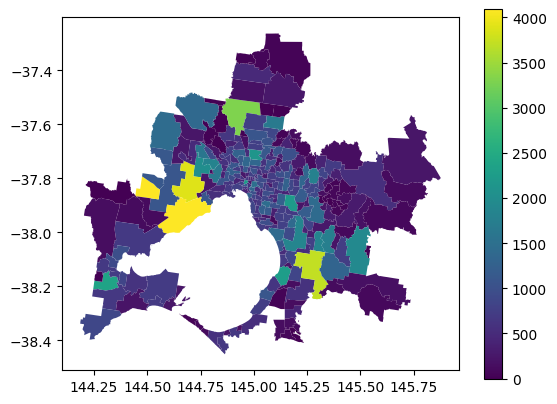

In [4]:
clipped_pred_poa = gpd.read_file("Predictions\\New\pred_poa.geojson")
sa1_poa = gpd.read_file("Shape\sa1_to_poa.gpkg")

high_thresh = int(synthetic[["INC"]].quantile(0.9))

sa1_high_inc = synthetic[synthetic["INC"] >= high_thresh][["SA1_CODE21", "INC"]].groupby("SA1_CODE21").count().reset_index()
sa1_high_inc["SA1_CODE21"] = sa1_high_inc["SA1_CODE21"].astype(str)

poa_high_inc = sa1_poa.merge(sa1_high_inc, on="SA1_CODE21", how="left").fillna(0)[["SA1_CODE21", "POA_CODE21", "INC"]].groupby("POA_CODE21").sum().reset_index()
poa_high_inc = clipped_pred_poa.merge(poa_high_inc, on="POA_CODE21", how="left")
poa_high_inc.to_file("Predictions\\high_inc_poa.geojson", driver='GeoJSON')
poa_high_inc.plot(column="INC", legend=True)

C:\Users\danla\AppData\Local\Temp\ipykernel_7052\4190902680.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop = sa1_poa.merge(pop, on="SA1_CODE21", how="left").fillna(0)[["SA1_CODE21", "POA_CODE21", "pop"]].groupby("POA_CODE21").sum().reset_index()


<Axes: >

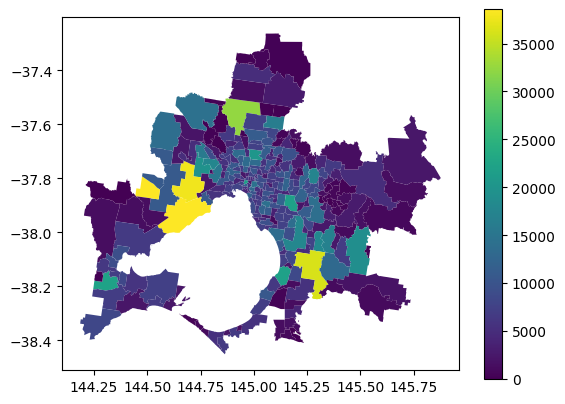

In [5]:
pop  = synthetic.groupby("SA1_CODE21").count().reset_index()[["SA1_CODE21", "INC"]]
pop.rename(columns={"INC": "pop"}, inplace=True)

pop["SA1_CODE21"] = pop["SA1_CODE21"].astype(str)

pop = sa1_poa.merge(pop, on="SA1_CODE21", how="left").fillna(0)[["SA1_CODE21", "POA_CODE21", "pop"]].groupby("POA_CODE21").sum().reset_index()
pop = clipped_pred_poa.merge(pop, on="POA_CODE21", how="left")
pop.plot(column="pop", legend=True)

C:\Users\danla\AppData\Local\Temp\ipykernel_7052\1324143085.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poa_high_inc = sa1_poa.merge(sa1_high_inc, on="SA1_CODE21", how="left").fillna(0)[["SA1_CODE21", "POA_CODE21", "INC"]].groupby("POA_CODE21").sum().reset_index()


<Axes: >

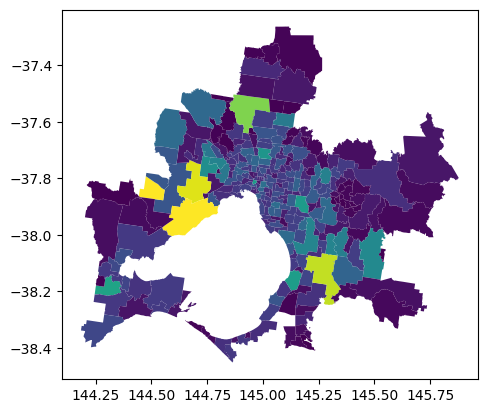

In [6]:
clipped_pred_poa = gpd.read_file("Predictions\\New\pred_poa.geojson")
sa1_poa = gpd.read_file("Shape\sa1_to_poa.gpkg")

high_thresh = int(synthetic[["INC"]].quantile(0.9))

sa1_high_inc = synthetic[synthetic["INC"] >= high_thresh][["SA1_CODE21", "INC"]].groupby("SA1_CODE21").count().reset_index()
sa1_high_inc["SA1_CODE21"] = sa1_high_inc["SA1_CODE21"].astype(str)

poa_high_inc = sa1_poa.merge(sa1_high_inc, on="SA1_CODE21", how="left").fillna(0)[["SA1_CODE21", "POA_CODE21", "INC"]].groupby("POA_CODE21").sum().reset_index()
poa_high_inc = clipped_pred_poa.merge(poa_high_inc, on="POA_CODE21", how="left")
poa_high_inc.to_file("Predictions\\high_inc_poa.geojson", driver='GeoJSON')
poa_high_inc.plot(column="INC")

In [7]:
high_thresh

3625

In [8]:
synthetic[synthetic["SA1_CODE21"] == 20604150504]["INC"].mean()

#20603111634

1786.3913337846986

In [9]:
sa1_counts = synthetic["SA1_CODE21"].value_counts()
sa1_counts = sa1_counts.reset_index()
sa1_counts.columns = ["SA1_CODE21", "Count"]
sa1_counts

,SA1_CODE21,Count
0,20604150504,1477
1,20603111634,904
2,20904121616,857
3,20604150518,760
4,20904143319,687
...,...,...
11959,20803119306,3
11960,21301134010,3
11961,21205132640,3
11962,21304157706,3


In [10]:
synthetic

,SA1_CODE21,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,house_id,score,assign_ev
0,20302104732,350.0,1.0,3.0,0,0,1,0,1,0,0,0,0,0,0.155160,0
1,20302104732,3600.0,0.0,2.0,0,0,1,0,0,0,1,0,0,1,-0.101160,0
2,20302104732,1900.0,1.0,2.0,0,0,1,0,0,0,1,0,0,2,-0.239749,0
3,20302104732,350.0,3.0,3.0,0,0,1,0,0,0,1,0,0,3,-0.152698,0
4,20302104732,800.0,2.0,2.0,0,0,1,0,1,0,0,0,0,4,-0.087372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901069,21402159223,2850.0,1.0,1.0,0,1,0,0,0,0,1,0,0,1901069,0.021787,0
1901070,21402159223,3200.0,2.0,1.0,0,0,1,0,0,0,1,0,0,1901070,0.055612,0
1901071,21402159223,2800.0,1.0,1.0,0,0,1,0,1,0,0,0,0,1901071,0.187360,0
1901072,21402159223,3000.0,0.0,1.0,1,0,0,0,0,1,0,0,0,1901072,0.363705,0


In [11]:
SA1_top_data = synthetic[synthetic["SA1_CODE21"] == 20603111634].drop(columns=["SA1_CODE21", "assign_ev", "score", "house_id"])
passed = SA1_top_data[SA1_top_data["INC"] >= 3625]
passed = passed[passed["TOTALVEHS"] >= 2]
passed = passed[passed["HHSIZE"] >= 2]
passed = passed[passed["dwelltype_Separate House"] == 1]
passed[(passed["owndwell_Being Purchased"] == 1) | (passed["owndwell_Fully Owned"] == 1)].count()



INC                            16
TOTALVEHS                      16
HHSIZE                         16
dwelltype_Flat or Apartment    16
dwelltype_Other                16
dwelltype_Separate House       16
dwelltype_Terrace/Townhouse    16
owndwell_Being Purchased       16
owndwell_Being Rented          16
owndwell_Fully Owned           16
owndwell_Occupied Rent-Free    16
owndwell_Something Else        16
dtype: int64

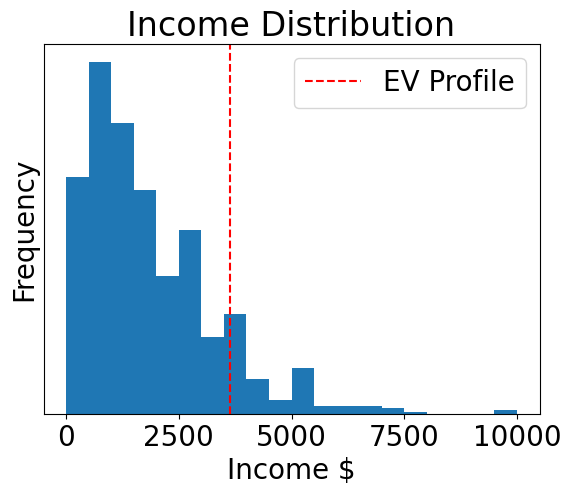

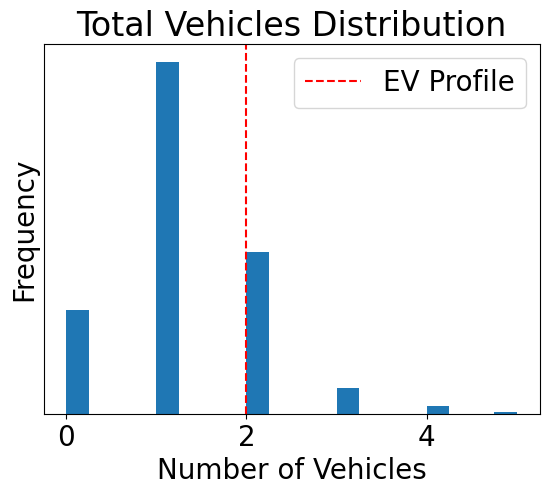

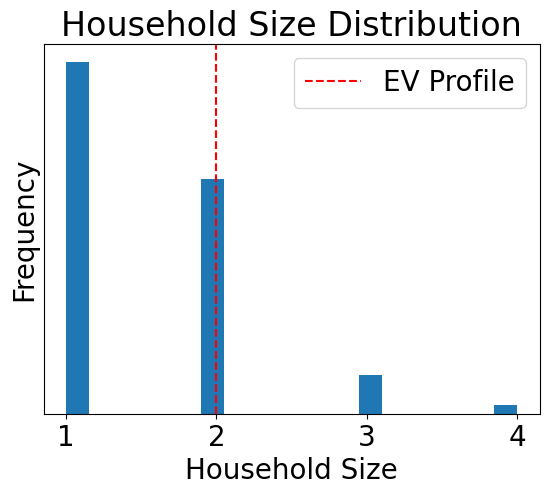

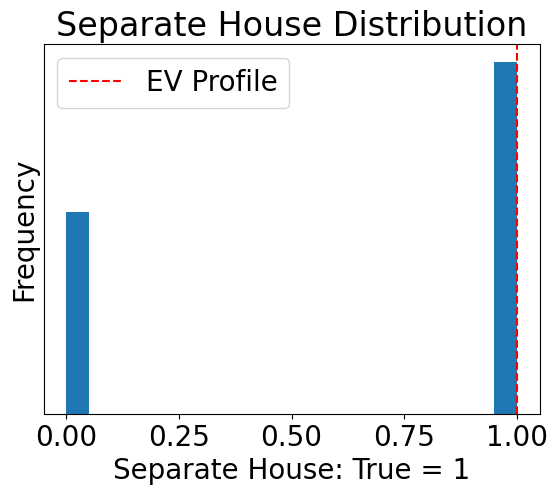

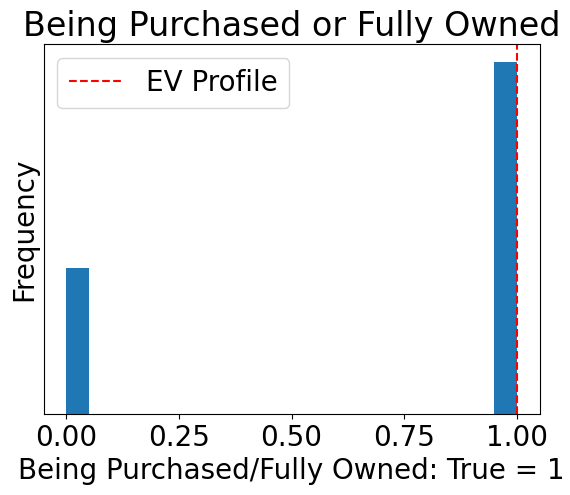

In [12]:
import matplotlib.pyplot as plt

# Define a function to create a histogram with a red dashed line for the 90th percentile
def create_histogram(data, title, red_line_value, x_axis):
    plt.hist(data, bins=20, color='#1F77B4', alpha=1)
    plt.axvline(x=red_line_value, color='red', linestyle='--', label='EV Profile')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel('Frequency')
    plt.yticks([])
    plt.legend()
    plt.show()

# Plot histograms for different columns

plt.rcParams.update({'font.size': 20})

SA1_top_data = synthetic[synthetic["SA1_CODE21"] == 20603111634].drop(columns=["SA1_CODE21", "assign_ev", "score", "house_id"])

create_histogram(SA1_top_data[["INC"]], 'Income Distribution', int(synthetic[["INC"]].quantile(0.9)), "Income $")
create_histogram(SA1_top_data[["TOTALVEHS"]], 'Total Vehicles Distribution', 2, "Number of Vehicles")
create_histogram(SA1_top_data[["HHSIZE"]], 'Household Size Distribution', 2, "Household Size")
create_histogram(SA1_top_data[["dwelltype_Separate House"]], 'Separate House Distribution', 1, "Separate House: True = 1") 
create_histogram(SA1_top_data["owndwell_Being Purchased"] + SA1_top_data["owndwell_Fully Owned"], 'Being Purchased or Fully Owned', 1, "Being Purchased/Fully Owned: True = 1")


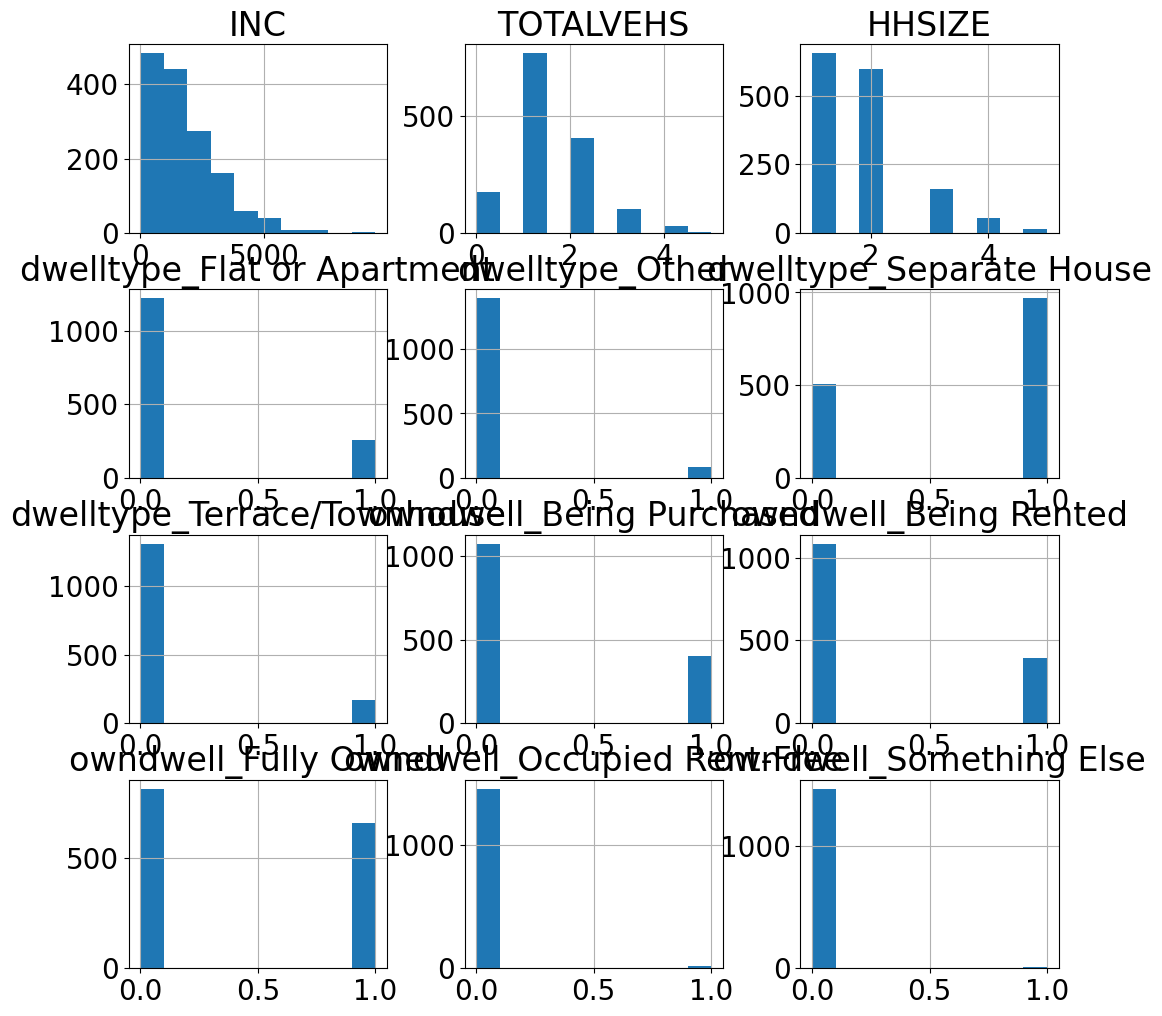

In [13]:
SA1_inc1_data = synthetic[synthetic["SA1_CODE21"] == 20604150504].drop(columns=["SA1_CODE21", "assign_ev", "score", "house_id"])

# Create a histogram for the filtered data
SA1_inc1_data.hist()

plt.gcf().set_size_inches(12, 12)  # 10 inches wide and 6 inches high, you can adjust the values as needed

plt.show()

# Show the plot
plt.show()





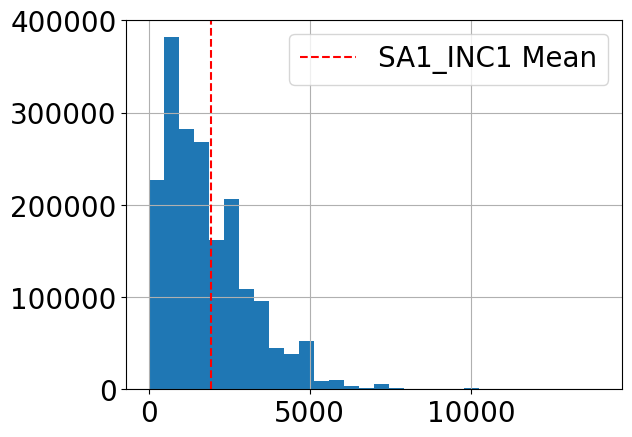

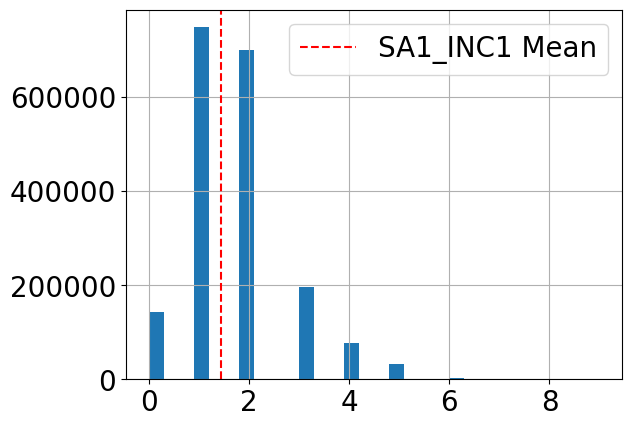

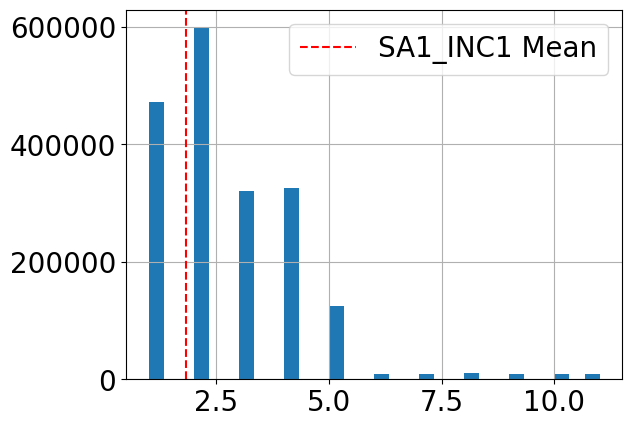

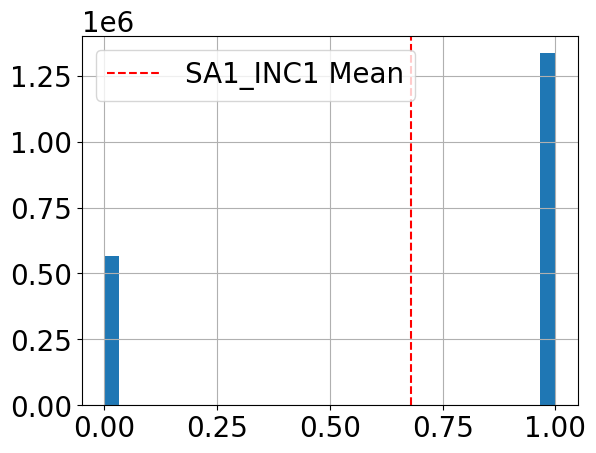

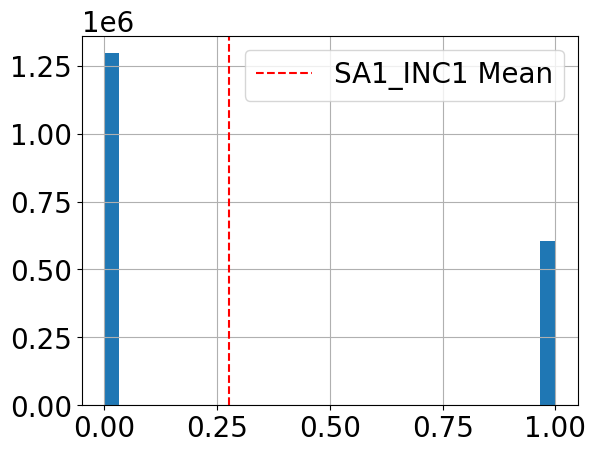

In [14]:
SA1_code = 20604150518    

SA1_inc1 = synthetic[synthetic["SA1_CODE21"] == SA1_code].mean()
num_bins = 30
synthetic["INC"].hist(bins=num_bins)
plt.axvline(x=SA1_inc1["INC"], color='red', linestyle='--', label='SA1_INC1 Mean')
plt.legend()
plt.show()

SA1_inc1 = synthetic[synthetic["SA1_CODE21"] == SA1_code].mean()
num_bins = 30
synthetic["TOTALVEHS"].hist(bins=num_bins)
plt.axvline(x=SA1_inc1["TOTALVEHS"], color='red', linestyle='--', label='SA1_INC1 Mean')
plt.legend()
plt.show()

SA1_inc1 = synthetic[synthetic["SA1_CODE21"] == SA1_code].mean()
num_bins = 30
synthetic["HHSIZE"].hist(bins=num_bins)
plt.axvline(x=SA1_inc1["HHSIZE"], color='red', linestyle='--', label='SA1_INC1 Mean')
plt.legend()
plt.show()

SA1_inc1 = synthetic[synthetic["SA1_CODE21"] == SA1_code].mean()
num_bins = 30
synthetic["dwelltype_Separate House"].hist(bins=num_bins)
plt.axvline(x=SA1_inc1["dwelltype_Separate House"], color='red', linestyle='--', label='SA1_INC1 Mean')
plt.legend()
plt.show()



SA1_inc1 = synthetic[synthetic["SA1_CODE21"] == SA1_code].mean()
num_bins = 30
synthetic["owndwell_Being Purchased"].hist(bins=num_bins)
plt.axvline(x=SA1_inc1["owndwell_Being Purchased"], color='red', linestyle='--', label='SA1_INC1 Mean')
plt.legend()
plt.show()

# num_bins = 100
# SA1_inc1 = int(synthetic[synthetic["SA1_CODE21"] == 20604150504]["SA1_CODE21"].value_counts())
# print(SA1_inc1)
# sa1_counts["Count"].hist(bins=num_bins)
# plt.axvline(x=SA1_inc1, color='red', linestyle='--', label='SA1_INC1 Mean')
# plt.legend()
# plt.show()

In [15]:
synthetic[synthetic["SA1_CODE21"] == 20604150518].mean()
  

SA1_CODE21                     2.060415e+10
INC                            1.930966e+03
TOTALVEHS                      1.446053e+00
HHSIZE                         1.834211e+00
dwelltype_Flat or Apartment    1.697368e-01
dwelltype_Other                6.052632e-02
dwelltype_Separate House       6.789474e-01
dwelltype_Terrace/Townhouse    9.078947e-02
owndwell_Being Purchased       2.763158e-01
owndwell_Being Rented          2.434211e-01
owndwell_Fully Owned           4.592105e-01
owndwell_Occupied Rent-Free    1.315789e-02
owndwell_Something Else        7.894737e-03
house_id                       2.566885e+05
score                          1.965404e-02
assign_ev                      3.947368e-03
dtype: float64

In [16]:
area_code = pd.read_csv("Data\\area_codes.csv")

In [17]:
synthetic = synthetic.dropna()
ev_pop = synthetic[synthetic["assign_ev"] == 1]
non_ev_pop = synthetic[synthetic["assign_ev"] == 0]

print(ev_pop.shape[0], non_ev_pop.shape[0])
print(f"{ev_pop.shape[0]/ non_ev_pop.shape[0]*100}%")

5870 1895204
0.3097291901030179%


In [18]:


synthetic[synthetic["INC"] <= 1828].count()[0] / synthetic["INC"].count()
synthetic["INC"].quantile(0.5998367238729265)

1834.2037553507835

In [19]:
sampled_non_ev_pop = non_ev_pop.sample(len(ev_pop), random_state=42)
even_pop = pd.concat([ev_pop, sampled_non_ev_pop], axis=0)

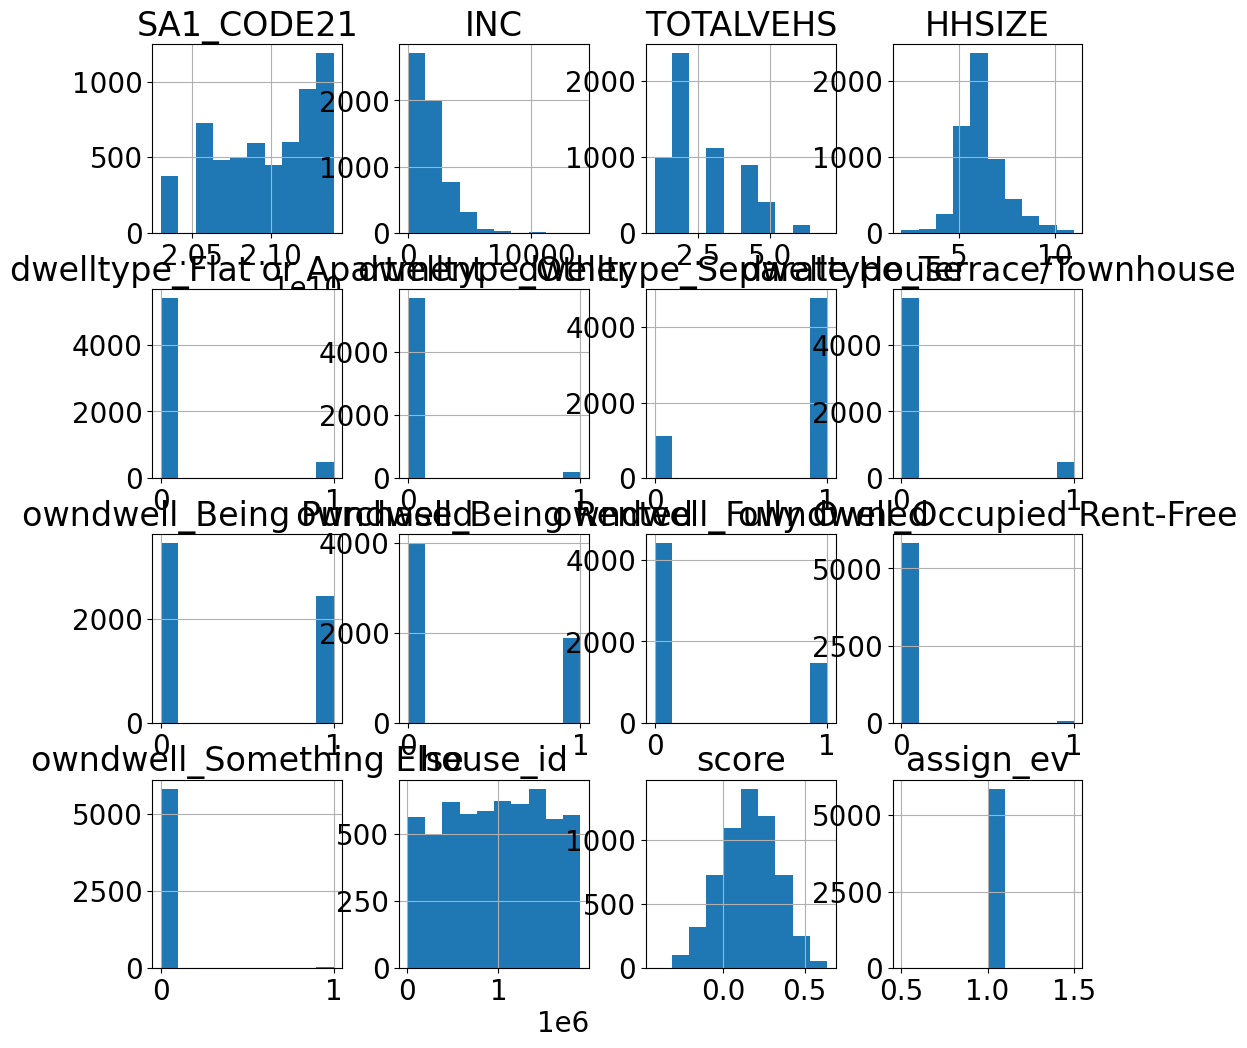

In [20]:
ev_pop.hist()
plt.gcf().set_size_inches(12, 12)  # 10 inches wide and 6 inches high, you can adjust the values as needed

plt.show()

In [21]:
synthetic 


,SA1_CODE21,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,house_id,score,assign_ev
0,20302104732,350.0,1.0,3.0,0,0,1,0,1,0,0,0,0,0,0.155160,0
1,20302104732,3600.0,0.0,2.0,0,0,1,0,0,0,1,0,0,1,-0.101160,0
2,20302104732,1900.0,1.0,2.0,0,0,1,0,0,0,1,0,0,2,-0.239749,0
3,20302104732,350.0,3.0,3.0,0,0,1,0,0,0,1,0,0,3,-0.152698,0
4,20302104732,800.0,2.0,2.0,0,0,1,0,1,0,0,0,0,4,-0.087372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901069,21402159223,2850.0,1.0,1.0,0,1,0,0,0,0,1,0,0,1901069,0.021787,0
1901070,21402159223,3200.0,2.0,1.0,0,0,1,0,0,0,1,0,0,1901070,0.055612,0
1901071,21402159223,2800.0,1.0,1.0,0,0,1,0,1,0,0,0,0,1901071,0.187360,0
1901072,21402159223,3000.0,0.0,1.0,1,0,0,0,0,1,0,0,0,1901072,0.363705,0


In [30]:
import scipy.stats as stats
ev_pop = synthetic[synthetic["assign_ev"] == 1]
not_ev_pop = synthetic[synthetic["assign_ev"] == 0]

attribute = "INC"
attribute = "TOTALVEHS"
t_statistic, p_value = stats.ttest_ind(ev_pop[attribute], not_ev_pop[attribute], equal_var=False)
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("The difference between the populations is statistically significant.")
else:
    print("There is no statistically significant difference between the populations.")

T-Statistic: 0.28373443743700083
P-Value: 0.7766238481261651
There is no statistically significant difference between the populations.


In [22]:
ev_pop = synthetic[synthetic["assign_ev"] == 1]
not_ev_pop = synthetic[synthetic["assign_ev"] == 0]

# for i in ev_pop.mean():
#     print("{:.3f}".format(i*100) + "%")


print(ev_pop.median())
print("\n\n")
print(not_ev_pop.mean())

SA1_CODE21                     2.100512e+10
INC                            1.600000e+03
TOTALVEHS                      2.000000e+00
HHSIZE                         6.000000e+00
dwelltype_Flat or Apartment    0.000000e+00
dwelltype_Other                0.000000e+00
dwelltype_Separate House       1.000000e+00
dwelltype_Terrace/Townhouse    0.000000e+00
owndwell_Being Purchased       0.000000e+00
owndwell_Being Rented          0.000000e+00
owndwell_Fully Owned           0.000000e+00
owndwell_Occupied Rent-Free    0.000000e+00
owndwell_Something Else        0.000000e+00
house_id                       9.815955e+05
score                          1.617994e-01
assign_ev                      1.000000e+00
dtype: float64



SA1_CODE21                     2.095852e+10
INC                            1.823304e+03
TOTALVEHS                      1.698599e+00
HHSIZE                         2.646975e+00
dwelltype_Flat or Apartment    1.437159e-01
dwelltype_Other                5.068425e-02
dwelltype_Sepa

In [23]:
for i in ev_pop.mean():
    print("{:.3f}".format(i*100) + "%")


print(ev_pop.mean())

2096585203152.623%
182840.681%
260.392%
615.690%
7.905%
2.896%
81.278%
7.922%
41.397%
32.044%
24.974%
1.022%
0.562%
96520682.998%
15.595%
100.000%
SA1_CODE21                     2.096585e+10
INC                            1.828407e+03
TOTALVEHS                      2.603918e+00
HHSIZE                         6.156899e+00
dwelltype_Flat or Apartment    7.904600e-02
dwelltype_Other                2.896082e-02
dwelltype_Separate House       8.127768e-01
dwelltype_Terrace/Townhouse    7.921635e-02
owndwell_Being Purchased       4.139693e-01
owndwell_Being Rented          3.204429e-01
owndwell_Fully Owned           2.497445e-01
owndwell_Occupied Rent-Free    1.022147e-02
owndwell_Something Else        5.621806e-03
house_id                       9.652068e+05
score                          1.559540e-01
assign_ev                      1.000000e+00
dtype: float64


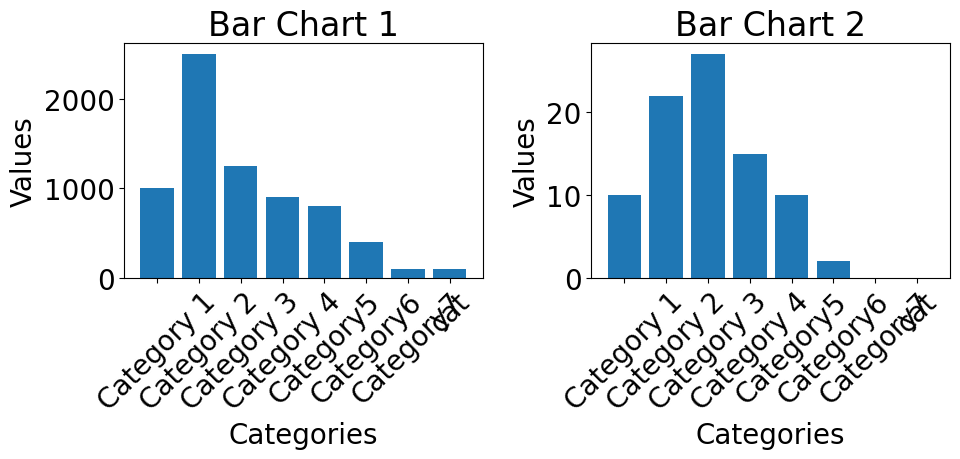

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ["Category 1", "Category 2", "Category 3", "Category 4", "Category5", "Category6", "Category7", "cat"]
data1 = [1000, 2500, 1250, 900, 800, 400, 100, 100]
data2 = [10, 22, 27, 15, 10, 2, 0, 0]

# Create a figure and axis
plt.figure(figsize=(10, 5))

# First bar chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.bar(categories, data1)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart 1")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Second bar chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.bar(categories, data2)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart 2")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


c:\Users\danla\anaconda3\envs\fYP\lib\site-packages\matplotlib\axes\_axes.py:6890: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


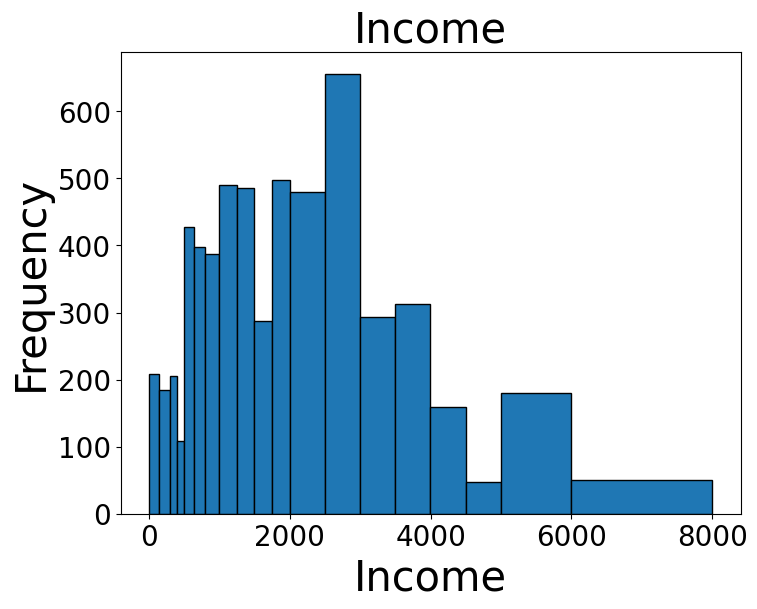

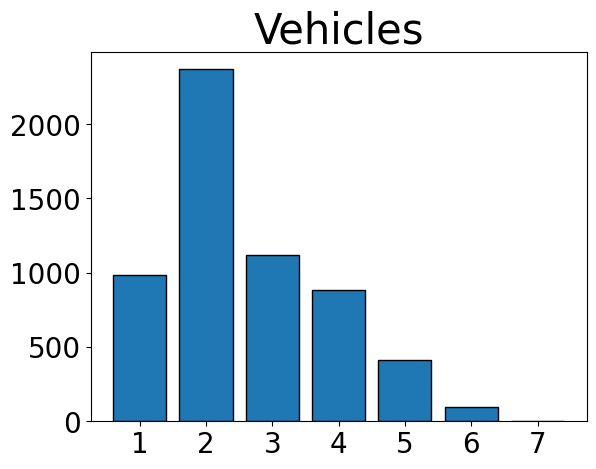

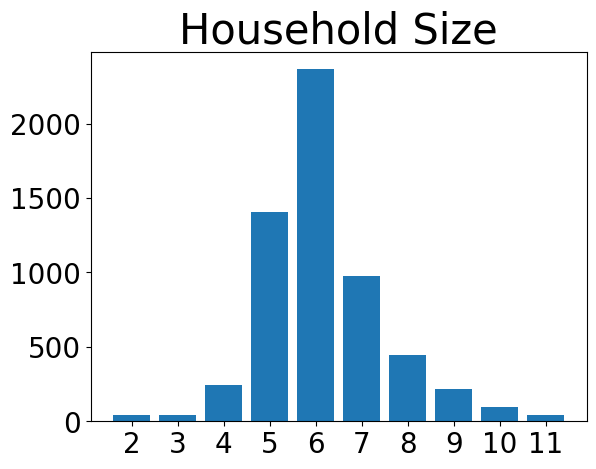

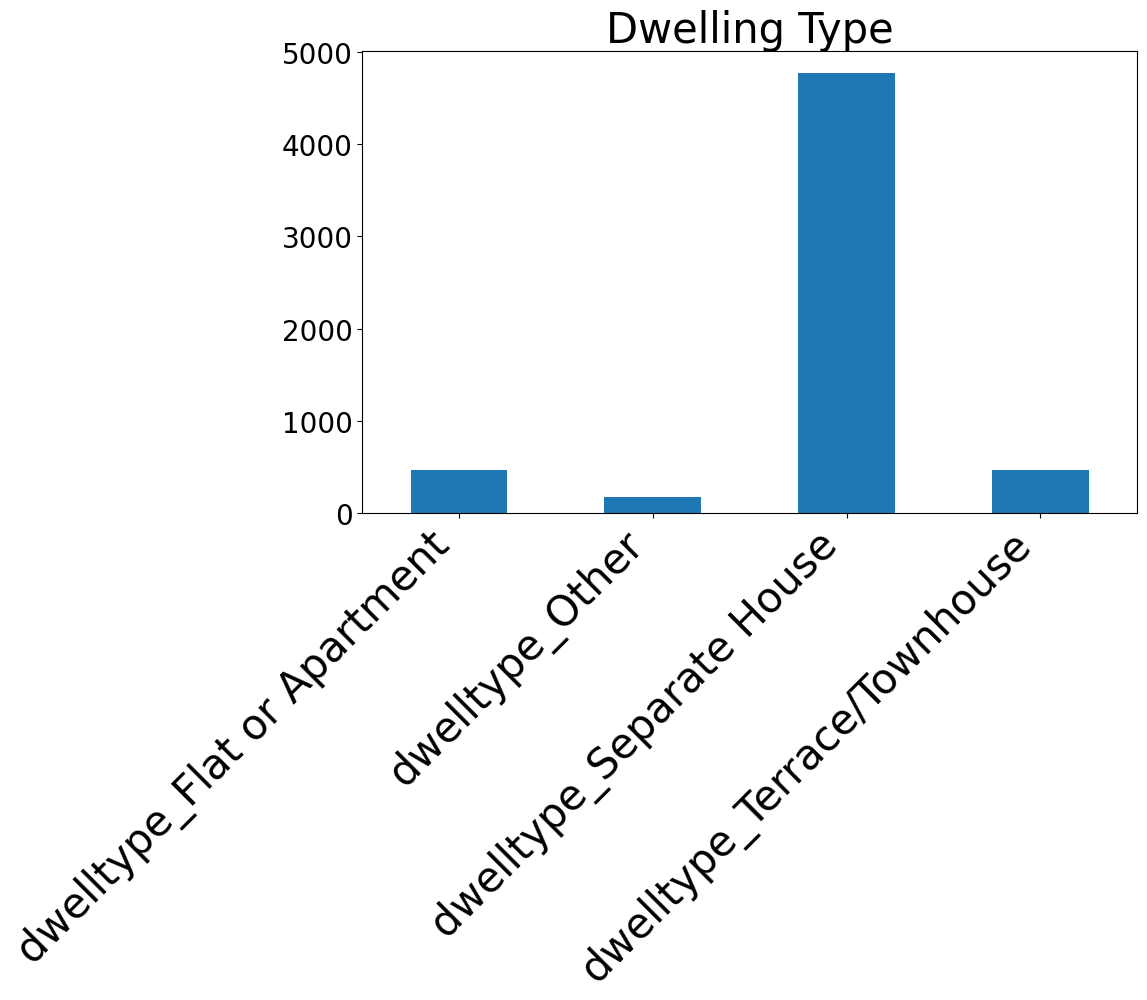

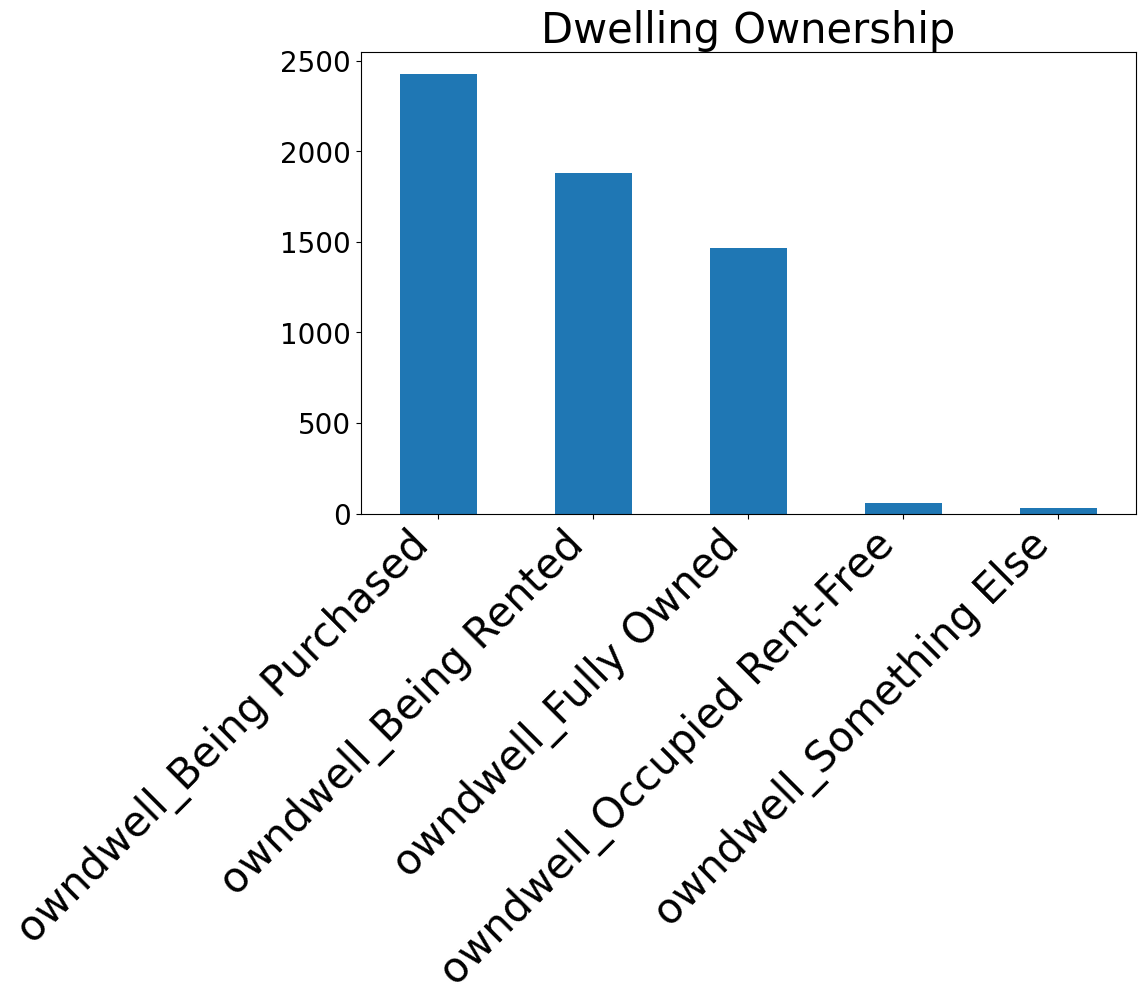

In [25]:
import matplotlib.pyplot as plt

# Define the font size variable
font_size = 30

dwelling_type = [
    "dwelltype_Flat or Apartment", "dwelltype_Other", "dwelltype_Separate House", "dwelltype_Terrace/Townhouse"]

dwelling_ownership = [
    "owndwell_Being Purchased", "owndwell_Being Rented", "owndwell_Fully Owned", "owndwell_Occupied Rent-Free", "owndwell_Something Else"]

inc_data = ev_pop["INC"]
vehs_data = ev_pop["TOTALVEHS"]
hhsize_data = ev_pop["HHSIZE"]
# categorical_data = ev_pop[categorical_columns].sum()

inc_bins = [0, 149, 299, 399, 499, 649, 799, 999, 1249, 1499, 1749, 1999, 2499, 2999, 3499, 3999, 4499, 4999, 5999, 7999, float("inf")]
hhsize_bins = [1, 2, 3, 4, 5, 6, 7, float("inf")]
vehs_bins = [0, 1, 2, 3, 4, float("inf")]

# Create separate plots for each variable
plt.figure(figsize=(8, 6))

# Plot the Income Histogram
plt.hist(inc_data, bins=inc_bins, edgecolor='black')
plt.xlabel("Income", fontsize=font_size)  # Set font size for xlabel
plt.ylabel("Frequency", fontsize=font_size)  # Set font size for ylabel
plt.title("Income", fontsize=font_size)  # Set font size for title
plt.show()

labels, counts = np.unique(vehs_data, return_counts=True)
plt.bar(labels, counts, align='center',  edgecolor='black')
plt.gca().set_xticks(labels)
plt.title("Vehicles", fontsize=font_size)  # Set font size for title
plt.show()

labels, counts = np.unique(hhsize_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Household Size", fontsize=font_size)  # Set font size for title
plt.show()

# Plot the Categorical Data Bar Chart
cat = ev_pop[dwelling_type].sum()
cat.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, va='top', ha='right', fontsize=font_size)  # Set font size for x-axis labels
plt.title("Dwelling Type", fontsize=font_size)  # Set font size for title
plt.show()

cat = ev_pop[dwelling_ownership].sum()
cat.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, va='top', ha='right', fontsize=font_size)  # Set font size for x-axis labels
plt.title("Dwelling Ownership", fontsize=font_size)  # Set font size for title
plt.show()


c:\Users\danla\anaconda3\envs\fYP\lib\site-packages\matplotlib\axes\_axes.py:6890: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


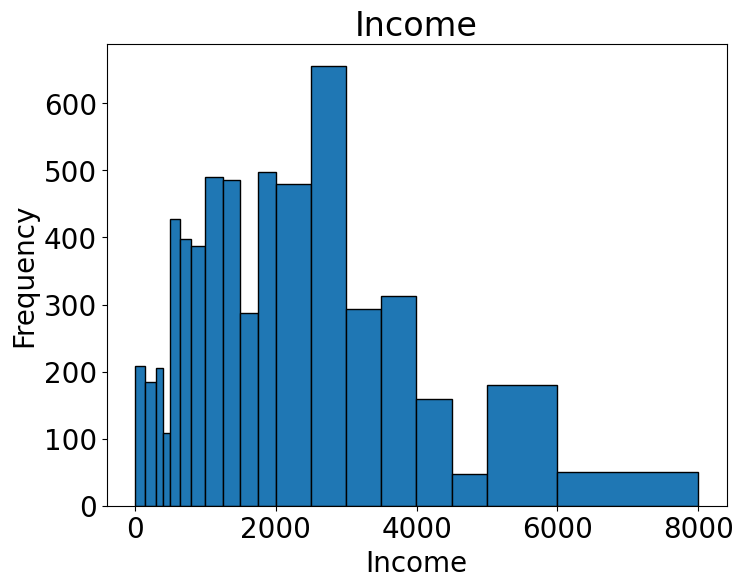

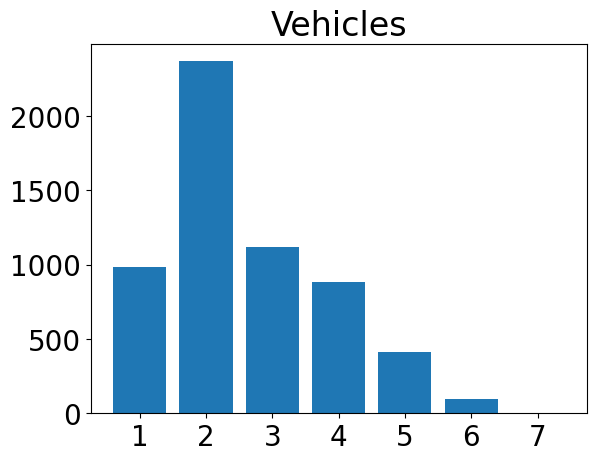

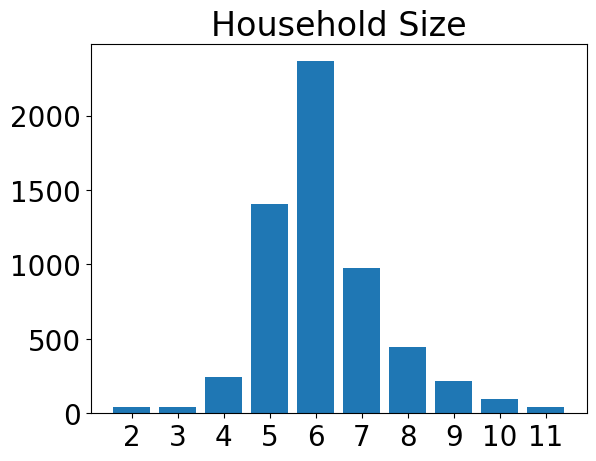

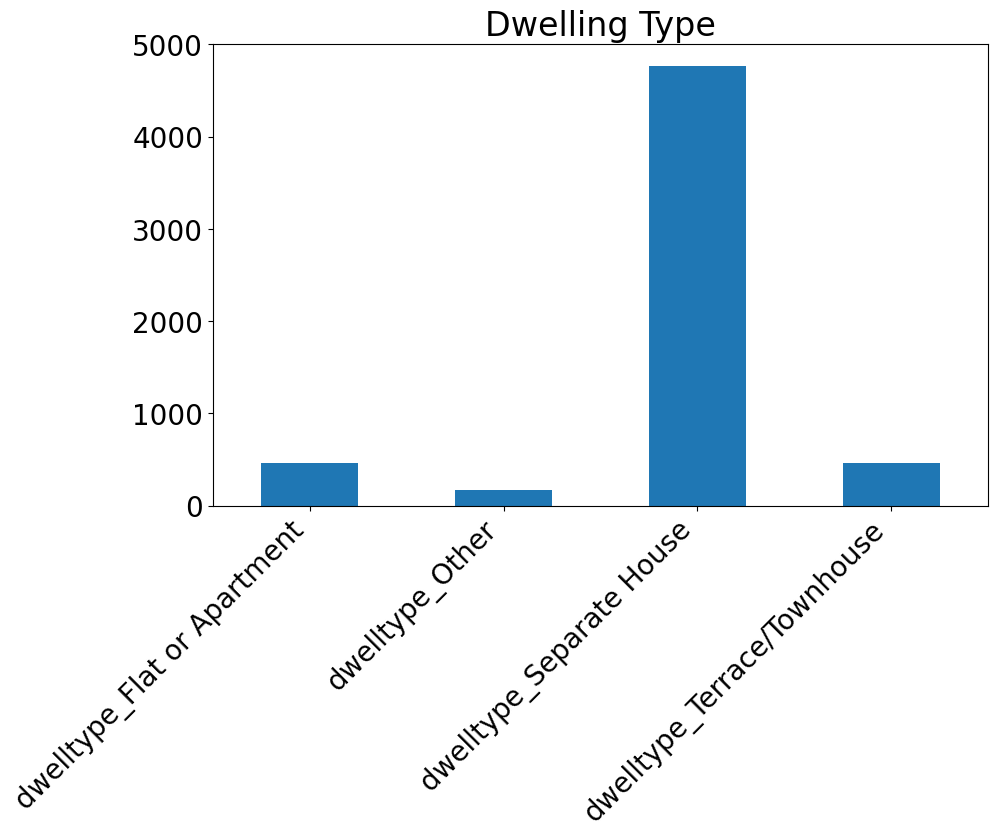

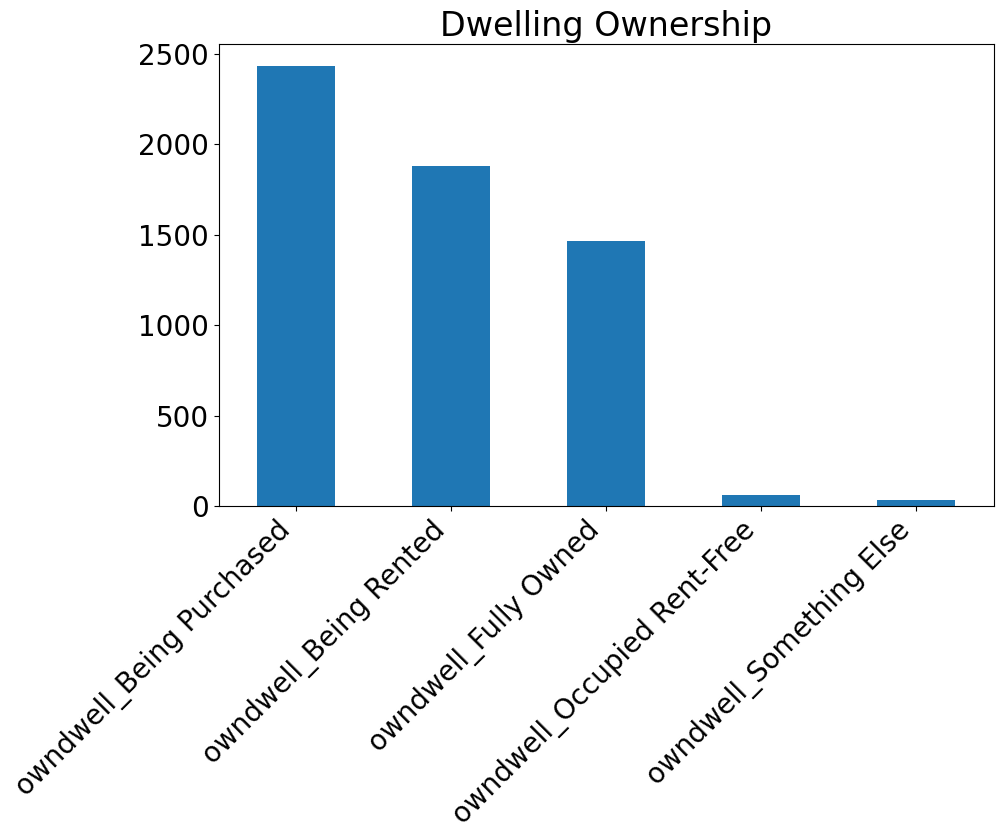

In [26]:
import matplotlib.pyplot as plt

dwelling_type = [
    "dwelltype_Flat or Apartment", "dwelltype_Other", "dwelltype_Separate House", "dwelltype_Terrace/Townhouse"]

dwelling_ownership = [
        "owndwell_Being Purchased", "owndwell_Being Rented", "owndwell_Fully Owned", "owndwell_Occupied Rent-Free", "owndwell_Something Else"]

inc_data = ev_pop["INC"]
vehs_data = ev_pop["TOTALVEHS"]
hhsize_data = ev_pop["HHSIZE"]
# categorical_data = ev_pop[categorical_columns].sum()

inc_bins = [0, 149, 299, 399, 499, 649, 799, 999, 1249, 1499, 1749, 1999, 2499, 2999, 3499, 3999, 4499, 4999, 5999, 7999, float("inf")]
hhsize_bins = [1, 2, 3, 4, 5, 6, 7, float("inf")]
vehs_bins = [0, 1, 2, 3, 4, float("inf")]

# Create separate plots for each variable
plt.figure(figsize=(8, 6))

# Plot the Income Histogram
plt.hist(inc_data, bins=inc_bins, edgecolor='black')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income")
plt.show()

labels, counts = np.unique(vehs_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Vehicles")
plt.show()

labels, counts = np.unique(hhsize_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Household Size")
plt.show()

# Plot the Categorical Data Bar Chart
cat = ev_pop[dwelling_type].sum()
cat.plot(kind='bar', figsize=(10,6)) 
plt.xticks(rotation=45, va='top', ha='right') 
plt.title("Dwelling Type")
plt.show()

cat = ev_pop[dwelling_ownership].sum()
cat.plot(kind='bar', figsize=(10,6)) 
plt.xticks(rotation=45, va='top', ha='right') 
plt.title("Dwelling Ownership")
plt.show()


# Show each plot separately



In [17]:
X = synthetic[[
    'INC', 'TOTALVEHS', 'HHSIZE', 'dwelltype_Flat or Apartment',
    'dwelltype_Other', 'dwelltype_Separate House', 'dwelltype_Terrace/Townhouse',
    'owndwell_Being Purchased', 'owndwell_Being Rented', 'owndwell_Fully Owned',
    'owndwell_Occupied Rent-Free', 'owndwell_Something Else'
]]

y = synthetic['assign_ev']

model = sm.Logit(y, X)
result = model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.016814
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              assign_ev   No. Observations:              1901074
Model:                          Logit   Df Residuals:                  1901063
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                  0.1967
Time:                        18:53:25   Log-Likelihood:                -31965.
converged:                       True   LL-Null:                       -39791.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
INC                           3.57e-06   9.63e-06      0.371      0.711  

In [8]:
X =  even_pop[[
    'INC',
    'TOTALVEHS'
]]

X = sm.add_constant(X)
y = even_pop['assign_ev']

# Fit a logistic regression model
model = sm.Logit(y, X)
result = model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.617150
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              assign_ev   No. Observations:                11740
Model:                          Logit   Df Residuals:                    11737
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                  0.1096
Time:                        18:49:06   Log-Likelihood:                -7245.3
converged:                       True   LL-Null:                       -8137.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5412      0.052    -29.835      0.000      -1.642      -1.440
INC         4.925e-06   1.44e

In [9]:
X = synthetic.groupby('SA1_CODE21').mean()[[
    'INC', 'TOTALVEHS', 'HHSIZE', 'dwelltype_Flat or Apartment',
    'dwelltype_Other', 'dwelltype_Separate House', 'dwelltype_Terrace/Townhouse',
    'owndwell_Being Purchased', 'owndwell_Being Rented', 'owndwell_Fully Owned',
    'owndwell_Occupied Rent-Free', 'owndwell_Something Else',
]]

y = synthetic.groupby('SA1_CODE21').mean()

In [10]:
synthetic = synthetic.merge(area_code[["SA1_CODE21", "POA_CODE21"]], on="SA1_CODE21", how="left")

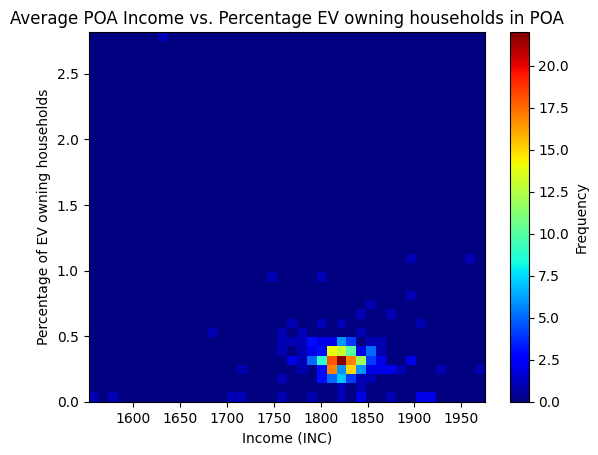

In [11]:
grouped_data = synthetic[["POA_CODE21", "INC", "assign_ev"]].groupby("POA_CODE21").mean()

# Extract the "INC" and "assign_ev" columns from the grouped data
income = grouped_data["INC"]
assigned_events = grouped_data["assign_ev"] * 100

# Create a histogram with higher resolution (increased number of bins)
plt.hist2d(
    income,
    assigned_events,
    bins=(40, 40),  # Increase the number of bins for higher resolution
    cmap=plt.cm.jet,
)
plt.colorbar(label='Frequency')
plt.xlabel('Income (INC)')
plt.ylabel('Percentage of EV owning households')
plt.title('Average POA Income vs. Percentage EV owning households in POA')
plt.show()

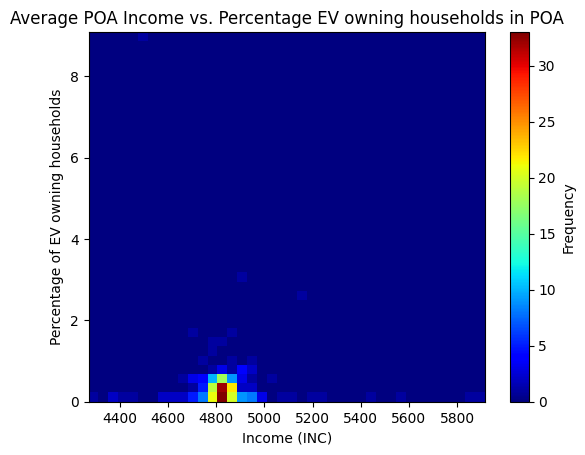

In [12]:
high_inc = synthetic[synthetic["INC"] > synthetic["INC"].quantile(0.9)]
grouped_data = high_inc[["POA_CODE21", "INC", "assign_ev"]].groupby("POA_CODE21").mean()

income = grouped_data["INC"]
assigned_events = grouped_data["assign_ev"] * 100

plt.hist2d(
    income,
    assigned_events,
    bins=(40, 40),  # Increase the number of bins for higher resolution
    cmap=plt.cm.jet,
)
plt.colorbar(label='Frequency')
plt.xlabel('Income (INC)')
plt.ylabel('Percentage of EV owning households')
plt.title('Average POA Income vs. Percentage EV owning households in POA')
plt.show()


In [13]:
print(synthetic["INC"].quantile(0.55))

1750.0


In [14]:
mean_value = ev_pop.mean()

def custom_format(x):
    return f"{x:.2f}"

pd.options.display.float_format = custom_format
print(mean_value)

SA1_CODE21                    20965852031.53
INC                                  1828.41
TOTALVEHS                               2.60
HHSIZE                                  6.16
dwelltype_Flat or Apartment             0.08
dwelltype_Other                         0.03
dwelltype_Separate House                0.81
dwelltype_Terrace/Townhouse             0.08
owndwell_Being Purchased                0.41
owndwell_Being Rented                   0.32
owndwell_Fully Owned                    0.25
owndwell_Occupied Rent-Free             0.01
owndwell_Something Else                 0.01
house_id                           965206.83
score                                   0.16
assign_ev                               1.00
dtype: float64


In [14]:
print(ev_pop["INC"].mean(), non_ev_pop["INC"].mean())
print(ev_pop["TOTALVEHS"].mean(), non_ev_pop["TOTALVEHS"].mean())
print(ev_pop["HHSIZE"].mean(), non_ev_pop["HHSIZE"].mean())
print(ev_pop["dwelltype_Separate House"].mean(), non_ev_pop["dwelltype_Separate House"].mean())
print(ev_pop["owndwell_Fully Owned"].mean(), non_ev_pop["owndwell_Fully Owned"].mean())


1785.4517887563884 1823.770668243387
2.1449744463373084 1.6995498996354015
3.7909710391822826 2.6535270292619284
0.7775127768313458 0.7019133589226128
0.313458262350937 0.4085093181800985


## ---------

In [81]:
sa1_to_poa = gpd.read_file("Shape\sa1_to_poa.gpkg")
sa1_to_lga = gpd.read_file("Shape\sa1_to_lga.gpkg")
poa_selected = gpd.read_file("Shape\poa_selected.gpkg")
sa1_poa = sa1_to_poa[["SA1_CODE21", "POA_CODE21"]]
sa1_lga = sa1_to_lga[["SA1_CODE21", "LGA_CODE21"]]

In [64]:
synthetic = pd.read_csv("Data\clean1.1_data.csv")
synthetic["SA1"] = synthetic["SA1"].astype(str)
synthetic = synthetic.merge(sa1_poa, left_on="SA1", right_on="SA1_CODE21", how="left")
synthetic = synthetic.merge(sa1_lga, on="SA1_CODE21", how="left")
synthetic = synthetic.drop(columns="SA1").dropna()
desired_column_order = ['SA1_CODE21', 'POA_CODE21', 'LGA_CODE21']

# Reorder the columns
synthetic = synthetic[desired_column_order + [col for col in synthetic.columns if col not in desired_column_order]]

C:\Users\danla\AppData\Local\Temp\ipykernel_4668\265056147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sa1_pop = synthetic.groupby("SA1_CODE21").mean().reset_index()


<Axes: >

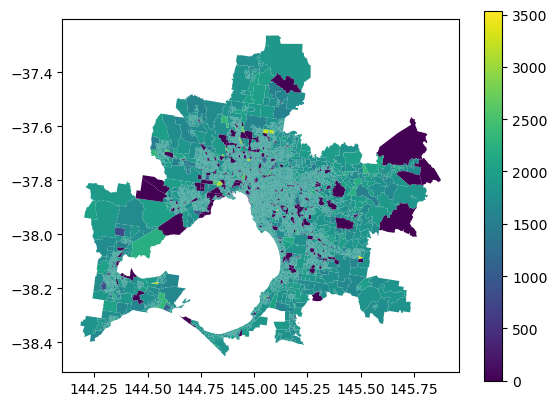

In [118]:
sa1_pop = synthetic.groupby("SA1_CODE21").mean().reset_index()
sa1_pop = sa1_to_poa.merge(sa1_pop, on="SA1_CODE21", how="left")
sa1_pop.fillna(0, inplace=True)
sa1_pop.plot(column="INC", cmap='viridis', legend=True)

C:\Users\danla\AppData\Local\Temp\ipykernel_4668\36792447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poa_pop = synthetic.groupby("POA_CODE21").mean().reset_index()


<Axes: >

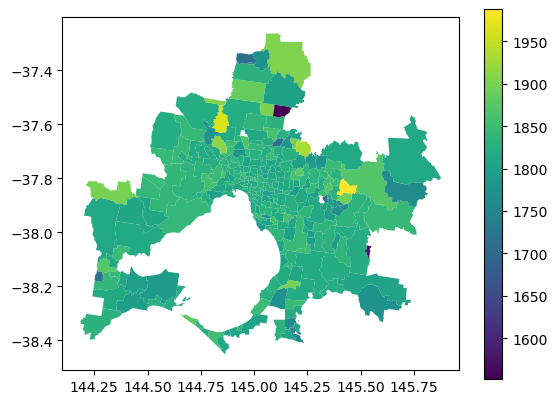

In [123]:
poa_pop = synthetic.groupby("POA_CODE21").mean().reset_index()
poa_pop = poa_selected.merge(poa_pop, on="POA_CODE21", how="left").dropna()
poa_pop.fillna(0, inplace=True)
poa_pop.plot(column="INC", legend=True)

C:\Users\danla\AppData\Local\Temp\ipykernel_4668\1358960227.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poa_high_inc_pop = high_inc_synthetic.groupby("POA_CODE21").mean().reset_index()


<Axes: >

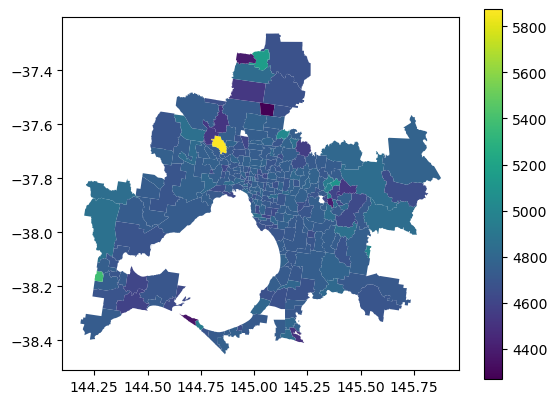

In [131]:
top_10_percent_quantile = synthetic["INC"].quantile(0.90)
high_inc_synthetic = synthetic[synthetic["INC"] >= top_10_percent_quantile]

poa_high_inc_pop = high_inc_synthetic.groupby("POA_CODE21").mean().reset_index()
poa_high_inc_pop = poa_selected.merge(poa_high_inc_pop, on="POA_CODE21", how="left").dropna()
poa_high_inc_pop.fillna(0, inplace=True)
poa_high_inc_pop.plot(column="INC", legend=True)

In [24]:
unique_sa1_values = unclean_data["SA1"].unique()
list_SA1 = pd.DataFrame(unique_sa1_values, columns=["SA1_CODE21"])

<Axes: >

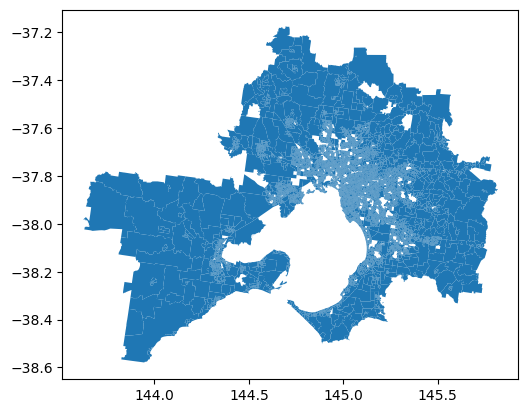

In [25]:
list_SA1["SA1_CODE21"] = list_SA1["SA1_CODE21"].astype(str)
sa1_all.merge(list_SA1, on="SA1_CODE21", how="right").plot()

In [5]:
poa = gpd.read_file("Shape\poa_selected.gpkg")
sa1 = gpd.read_file("Shape\sa1_to_poa.gpkg")

In [7]:
synthetic = pd.read_csv("Data\clean1.1_data.csv")
synthetic

,SA1,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else
0,20301103401,3625.0,2.0,6.0,0,0,1,0,1,0,0,0,0
1,20301103401,1825.0,1.0,7.0,0,0,1,0,1,0,0,0,0
2,20301103401,1375.0,2.0,7.0,0,0,0,1,1,0,0,0,0
3,20301103401,100.0,2.0,7.0,0,0,1,0,1,0,0,0,0
4,20301103401,900.0,3.0,7.0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900681,21402159223,2850.0,1.0,1.0,0,1,0,0,0,0,1,0,0
1900682,21402159223,3200.0,2.0,1.0,0,0,1,0,0,0,1,0,0
1900683,21402159223,2800.0,1.0,1.0,0,0,1,0,1,0,0,0,0
1900684,21402159223,3000.0,0.0,1.0,1,0,0,0,0,1,0,0,0


In [24]:
synthetic["SA1"] = synthetic["SA1"].astype(str)
population = synthetic.merge(sa1, left_on="SA1", right_on="SA1_CODE21", how="inner")

In [41]:
population["INC"].mean()

1823.6554690757919

In [30]:
population.groupby("POA_CODE21").mean().reset_index()

C:\Users\danla\AppData\Local\Temp\ipykernel_1392\1898125820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  population.groupby("POA_CODE21").mean().reset_index()


,POA_CODE21,INC,TOTALVEHS,HHSIZE,dwelltype_Flat or Apartment,dwelltype_Other,dwelltype_Separate House,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,AREASQKM21,AREASQKM
0,3000,1814.528982,1.328798,1.689726,0.180648,0.060492,0.648724,0.110136,0.253091,0.265778,0.466697,0.009377,0.005056,0.023453,7100.1467
1,3002,1808.181106,1.377013,1.820636,0.168916,0.057031,0.669569,0.104484,0.251633,0.266434,0.466260,0.012190,0.003483,0.068005,7100.1467
2,3003,1837.671863,1.424786,1.893998,0.179008,0.055339,0.654456,0.111198,0.261367,0.275396,0.449208,0.009613,0.004417,0.053207,7100.1467
3,3004,1812.527989,1.349638,1.725057,0.189122,0.063571,0.641709,0.105598,0.247042,0.275826,0.460357,0.009359,0.007417,0.055001,7100.1467
4,3006,1817.163203,1.370515,1.755789,0.174909,0.060735,0.656459,0.107897,0.251166,0.265841,0.465604,0.010518,0.006871,0.022511,7100.1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,3977,1819.402856,1.891172,3.180892,0.124544,0.043918,0.733317,0.098221,0.347641,0.253287,0.386118,0.008397,0.004558,0.567972,7100.1467
277,3978,1821.142159,1.944771,3.366206,0.117562,0.042625,0.740585,0.099228,0.371782,0.247269,0.369490,0.007181,0.004278,0.934982,7100.1467
278,3980,1823.928811,1.809045,2.886935,0.144054,0.041876,0.726131,0.087940,0.338358,0.260469,0.391122,0.008375,0.001675,3.646238,7100.1467
279,3981,1805.930295,1.746917,2.824129,0.145308,0.048257,0.693298,0.113137,0.314745,0.268097,0.401609,0.009651,0.005898,11.953318,7100.1467


In [52]:
evs = pd.read_csv("Data\poa_ev.csv")
evs["POA_CODE21"] = evs["POA_CODE21"].astype(str)
ev_pop = evs.merge(poa, on="POA_CODE21", how="left")

In [51]:
ev_pop["TOTAL1"].sum()

6560.0

In [61]:
evs.merge(population, on="POA_CODE21", how="left")["TOTAL1"].sum()

55965797.0

In [62]:
evs

,POA_CODE21,TOTAL1
0,3000,62.0
1,3002,29.0
2,3003,25.0
3,3004,26.0
4,3006,33.0
...,...,...
301,3230,13.0
302,3240,8.0
303,3331,11.0
304,3340,28.0


## Model